In [83]:
import os
import numpy as np 
import pandas as pd


In [84]:
os.chdir(r"D:\Imarticus\Time Series And Deep Learning\NLP")
messages=pd.read_csv("spam1.csv",encoding='cp1252')
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [85]:
messages.shape

(6776, 5)

In [86]:
messages.isnull().sum()

v1               0
v2               0
Unnamed: 2    6720
Unnamed: 3    6760
Unnamed: 4    6768
dtype: int64

In [87]:
messages=messages.iloc[:,[0,1]]

In [88]:
messages.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [89]:
messages.rename(columns={"v1":"label","v2":"message"},inplace=True)

In [90]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [91]:
messages.label.value_counts()

ham     5854
spam     922
Name: label, dtype: int64

In [92]:
messages.label.replace({"ham":0,"spam":1},inplace=True)

In [93]:
messages.label.value_counts()

0    5854
1     922
Name: label, dtype: int64

### Data Preparation 

* Convert all the data either in upper case or in lower case 
* Remove stop words
* Remove the punctuation

In [94]:
# Converting into lower case
messages.message=messages.message.str.lower() 

In [95]:
messages.head()

,label,message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [96]:
!pip install nltk

In [97]:
import nltk

In [98]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sasai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [99]:
from nltk.corpus import stopwords

In [100]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [101]:
len(stopwords.words('english'))

179

In [102]:
import string

In [103]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [104]:
def text_process(mess):            ### creating a function
    """                                                        ## a docstring
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [ word for word in nopunc.split() if word not in stopwords.words("english")]

In [105]:
abcd =("hello how are you ? i am ok ")

In [106]:
text_process(abcd)

['hello', 'ok']

In [107]:
messages['message'].apply(text_process)


0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
6771    [2nd, time, tried, 2, contact, u, u, å£750, po...
6772                   [ì, b, going, esplanade, fr, home]
6773                     [pity, mood, soany, suggestions]
6774    [guy, bitching, acted, like, id, interested, b...
6775                                   [rofl, true, name]
Name: message, Length: 6776, dtype: object

In [108]:
#It is used to get count of each and every word
from sklearn.feature_extraction.text import CountVectorizer 

In [109]:
bow_transformer = CountVectorizer(analyzer =text_process).fit(messages["message"])

In [110]:
# Count of each and every word
bow_transformer.vocabulary_ 

{'go': 3744,
 'jurong': 4640,
 'point': 6371,
 'crazy': 2459,
 'available': 1373,
 'bugis': 1836,
 'n': 5620,
 'great': 3841,
 'world': 9100,
 'la': 4799,
 'e': 2984,
 'buffet': 1834,
 'cine': 2174,
 'got': 3801,
 'amore': 1140,
 'wat': 8863,
 'ok': 5936,
 'lar': 4838,
 'joking': 4608,
 'wif': 8996,
 'u': 8527,
 'oni': 5968,
 'free': 3535,
 'entry': 3119,
 '2': 414,
 'wkly': 9052,
 'comp': 2290,
 'win': 9010,
 'fa': 3257,
 'cup': 2514,
 'final': 3381,
 'tkts': 8304,
 '21st': 434,
 'may': 5283,
 '2005': 421,
 'text': 8143,
 '87121': 836,
 'receive': 6769,
 'questionstd': 6660,
 'txt': 8511,
 'ratetcs': 6713,
 'apply': 1226,
 '08452810075over18s': 71,
 'dun': 2970,
 'say': 7123,
 'early': 2991,
 'hor': 4171,
 'c': 1885,
 'already': 1114,
 'nah': 5627,
 'dont': 2878,
 'think': 8217,
 'goes': 3758,
 'usf': 8657,
 'lives': 5000,
 'around': 1277,
 'though': 8236,
 'freemsg': 3543,
 'hey': 4067,
 'darling': 2578,
 '3': 518,
 'weeks': 8916,
 'word': 9086,
 'back': 1424,
 'id': 4290,
 'like': 4

In [111]:
len(bow_transformer.vocabulary_) 

9422

In [112]:
# I have Created TDM
messages_bow= bow_transformer.transform(messages.message)

In [113]:
messages_bow.shape

(6776, 9422)

In [114]:
type(messages_bow)

scipy.sparse.csr.csr_matrix

### Let's do sampling

In [115]:
# messages_bow is my x
# messages.lebel is my y

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
x_train,x_test,y_train,y_test=train_test_split(messages_bow,messages.label,test_size=.2)

In [118]:
from sklearn.naive_bayes import MultinomialNB
naive_bay= MultinomialNB()
spam_nb_model= naive_bay.fit(x_train,y_train)

In [119]:
pred= naive_bay.predict(x_test)

### Building the confusion matrix 

In [120]:
#getting model performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

In [121]:
tab1=confusion_matrix(pred,y_test)
tab1

array([[1135,   11],
       [  23,  187]], dtype=int64)

In [122]:
tab1.diagonal().sum()/tab1.sum()

0.9749262536873157

In [123]:
import matplotlib.pyplot as plt

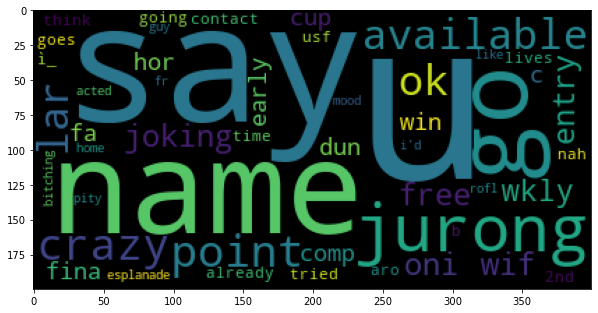

In [127]:
from wordcloud import WordCloud

cloud=WordCloud(stopwords=stopwords.words("english"),max_words=50).generate(str(messages['message']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

## Create a seperate plot (word cloud) on spma masseges and ham masseges and study the plot abd let me know the conclusion.

In [150]:
df_ham=messages[messages.label==0]
df_spam=messages[messages.label==1]

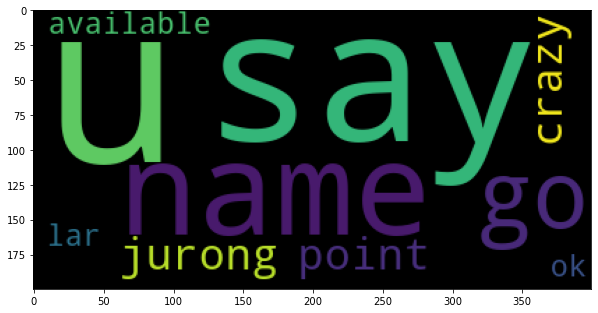

In [154]:
cloud=WordCloud(max_words=10).generate(str(df_ham['message']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

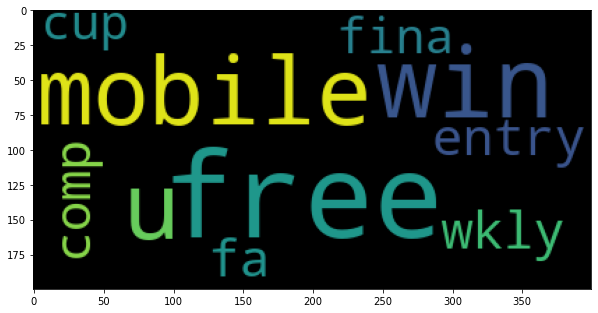

In [155]:
cloud=WordCloud(max_words=10).generate(str(df_spam['message']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

### Practice 2 Data Set

In [130]:
os.chdir(r"D:\Imarticus\Time Series And Deep Learning\NLP")

amazon=pd.read_csv("amazonreviews.tsv",sep="\t")

amazon                         

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
9995,pos,A revelation of life in small town America in ...
9996,pos,Great biography of a very interesting journali...
9997,neg,Interesting Subject; Poor Presentation: You'd ...
9998,neg,Don't buy: The box looked used and it is obvio...


In [67]:
amazon['review'].apply(text_process)

0       [Stuning, even, nongamer, This, sound, track, ...
1       [The, best, soundtrack, ever, anything, Im, re...
2       [Amazing, This, soundtrack, favorite, music, t...
3       [Excellent, Soundtrack, I, truly, like, soundt...
4       [Remember, Pull, Your, Jaw, Off, The, Floor, A...
                              ...                        
9995    [A, revelation, life, small, town, America, ea...
9996    [Great, biography, interesting, journalist, Th...
9997    [Interesting, Subject, Poor, Presentation, You...
9998    [Dont, buy, The, box, looked, used, obviously,...
9999    [Beautiful, Pen, Fast, Delivery, The, pen, shi...
Name: review, Length: 10000, dtype: object

In [68]:
# I have Created TDM
amazon_bow= bow_transformer.transform(amazon.review)

In [70]:
x_train1,x_test1,y_train1,y_test1=train_test_split(amazon_bow,amazon.label,test_size=.2)

In [71]:
spam_nb_model= naive_bay.fit(x_train1,y_train1)

In [72]:
pred1= naive_bay.predict(x_test1)

In [73]:
tab2=confusion_matrix(pred1,y_test1)
tab2

array([[808, 202],
       [189, 801]], dtype=int64)

In [76]:
tab2.diagonal().sum()/tab2.sum()

0.8045

### Practice 3 Data Set

In [138]:
os.chdir(r"D:\Imarticus\Time Series And Deep Learning\NLP")

Trip=pd.read_csv("Trip_advisor_review.csv")

Trip.head()

,Rating,Review
0,4,nice hotel expensive parking got good deal sta...
1,2,ok nothing special charge diamond member hilto...
2,3,nice rooms not 4* experience hotel monaco seat...
3,5,"unique, great stay, wonderful time hotel monac..."
4,5,"great stay great stay, went seahawk game aweso..."


In [139]:
Trip['Review'].apply(text_process)

0        [nice, hotel, expensive, parking, got, good, d...
1        [ok, nothing, special, charge, diamond, member...
2        [nice, rooms, 4, experience, hotel, monaco, se...
3        [unique, great, stay, wonderful, time, hotel, ...
4        [great, stay, great, stay, went, seahawk, game...
                               ...                        
20486    [best, kept, secret, 3rd, time, staying, charm...
20487    [great, location, price, view, hotel, great, q...
20488    [ok, looks, nice, modern, outside, desk, staff...
20489    [hotel, theft, ruined, vacation, hotel, opened...
20490    [people, talking, ca, nt, believe, excellent, ...
Name: Review, Length: 20491, dtype: object

In [140]:
# I have Created TDM
Trip_bow= bow_transformer.transform(Trip.Review)

In [141]:
x_train2,x_test2,y_train2,y_test2=train_test_split(Trip_bow,Trip.Rating,test_size=.2)

In [142]:
spam_nb_model= naive_bay.fit(x_train2,y_train2)

In [145]:
pred2= naive_bay.predict(x_test2)

In [146]:
tab3=confusion_matrix(pred2,y_test2)
tab3

array([[ 156,   74,   10,    7,    7],
       [  81,  132,   68,   30,   16],
       [  12,   59,   70,   63,   10],
       [  15,   67,  211,  604,  311],
       [  14,   33,   64,  547, 1438]], dtype=int64)

In [148]:
tab3.diagonal().sum()/tab3.sum()

0.5855086606489388

<h3><font color='red'> Task:-Go for DT and try using class weigh balanced </font></h3>